#INFO204 Assignment 3 Spam Visualisation and Retrieval
---
*Jackson Kerr | 2942576*

[GitHub Repo](https://github.com/JacksonKerr/LinearRegression)

---



## Imports

In [ ]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Getting Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
spam_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment_3/part_3/spam_test.csv.gz', index_col=0).reset_index()

In [ ]:
target_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment_3/part_3/targets.csv', index_col=0)
target_df

,email,outcome
data/farmer-d\personal\185,Daren I guess I need help with this too! Love...,False +
data/BG\2005\01\1107203924.30390_21.txt,Sorry for taking so long. I finally found that...,False -


# Perform learning on the data

In [ ]:
text = spam_df['email'].astype('U')
lab  = spam_df['outcome'].to_numpy()
text_train, text_test, lab_train, lab_test = train_test_split(text, lab, test_size=1000, stratify=lab, random_state=1234)

In [ ]:
from sklearn.manifold import TSNE
pipe = Pipeline([("feature_extraction", TfidfVectorizer()), 
                 ("reduction", TruncatedSVD(n_components=30, random_state=1234)),
                 ("mdl", TSNE(random_state=1234))])

In [ ]:
P = pipe.fit_transform(text_train, lab_train)

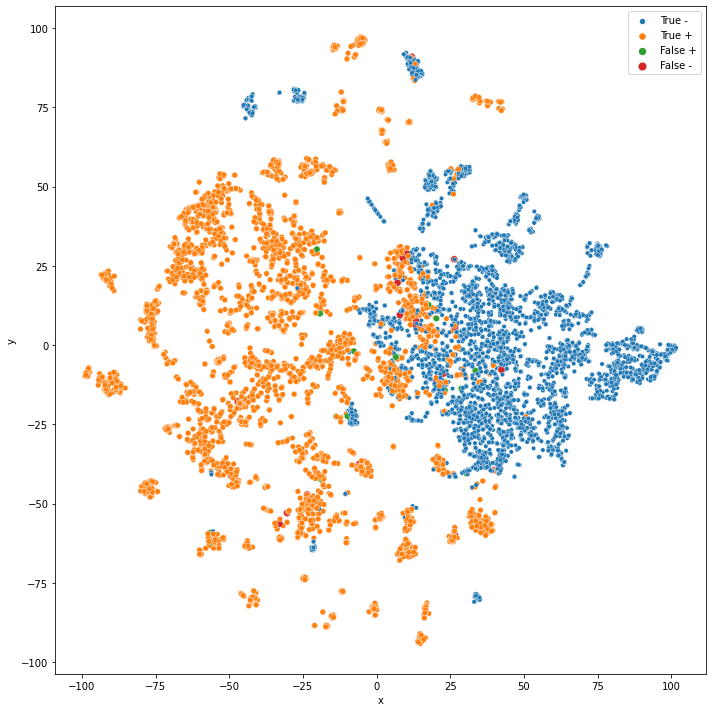

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=P[:, 0], y=P[:, 1], hue=lab_train, size=lab_train, sizes=(50, 20))
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()

# Nearest 3 Neighbors

In [ ]:
target_text     = target_df['email'].astype('U')
target_outcome  = target_df['outcome'].to_numpy()

P = pd.DataFrame(P)

from sklearn.neighbors import NearestNeighbors
srch = NearestNeighbors(n_neighbors=3).fit(P)

# Find target emails in spam_df and store index
neighbors = []
for i in range(len(target_text)): # For each target email
  index = spam_df.index[spam_df['email'] == target_text[i]].tolist() # Find it's index in the original dataset 
  P_target = P.iloc[index].values # Get it's location in embedding
  dst, idx = srch.kneighbors(P_target) # Find it's neighbors
  neighbors.append({'index':index[0], 'neighbors':idx, 'distances':dst}) # Store all the stuff

In [ ]:
data = []
for i in neighbors:
  for neighbour in spam_df.iloc[i['neighbors'][0]].values:
    from pprint import pprint
    data.append(neighbour)
data = pd.DataFrame(data, columns=["", "email", "outcome"])

In [ ]:
data.to_csv("submission.csv")